# Industrial Defect Inspection with image segmentation

In order to satisfy customers' needs, companies have to guarantee the quality of their products, which can often be achieved only by inspection of the finished product. Automatic visual defect detection has the potential to reduce the cost of quality assurance significantly.

## Data description

[`29th Annual Symposium of the German Association for Pattern Recognition, Weakly Supervised Learning for Industrial Optical Inspection, 2007.`](http://resources.mpi-inf.mpg.de/conferences/dagm/2007/prizes.html)

This dataset is artificially generated, but similar to real world problems. It consists of multiple data sets, each consisting of **1000** images showing the background texture without defects, and of **150** images with one labeled defect each on the background texture. The images in a single data set are very similar, but each data set is generated by a different texture model and defect model.

**Challenges**: Not all deviations from the texture are necessarily defects. The algorithm will need to use the weak labels provided during the training phase to learn the properties that characterize a defect.

Below are sample images from 6 data sets. In these examples, defects are weakly labeled by a surrounding ellipse, shown in red. 

In [1]:
!nvidia-smi

Sat Oct 31 20:26:08 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path_to_data = '/content/drive/My Drive/Colab Notebooks/defect_inspection/'

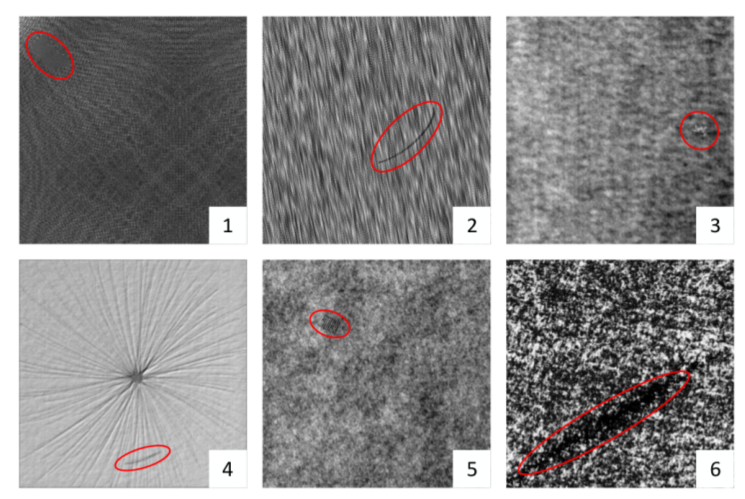

In [4]:
from IPython.display import Image
%matplotlib inline
Image(path_to_data + 'images/WeaklySpervisedLearningforIndustrialOpticalInspection.jpg')

Let's take a look on directories!

In [5]:
import os

In [6]:
os.listdir(path_to_data + 'data/DAGM/')

['Class4',
 'Class3_def',
 'Class6_def',
 'Class4_def',
 'Class1_def',
 'Class3',
 'Class2',
 'Class2_def',
 'Class5_def',
 'Class5',
 'Class1',
 'Class6']

### labeling data

Defect exists inside an image was bounded with an ellipse. The ellipse-parameters are provided in a separate .txt-file with a format as shown below. 

[filename] \t \n
[semi-major axis] \t [semi-minor axis] \t [rotation angle] \t
[x-position of the centre of the ellipsoid] \t [y-position of the centre of the ellipsoid] \n
[filename] \t ... 

In [7]:
!cat '/content/drive/My Drive/Colab Notebooks/defect_inspection/data/DAGM/Class1_def/labels.txt'

1	  60.24	  37.55	   0.65	  69.04	  87.60
2	  41.34	  35.83	   0.37	 315.40	 172.29
3	  53.98	  40.30	   1.53	 110.97	 170.01
4	  63.41	  53.70	   1.50	 253.14	  65.83
5	  71.81	  42.12	   0.62	 151.85	 312.05
6	  66.19	  64.12	   1.29	 143.03	 352.48
7	  47.17	  50.18	   0.20	  54.54	 255.97
8	  36.36	  40.48	   0.35	  42.06	 244.56
9	  63.10	  37.97	  -1.00	 119.86	 100.36
10	  56.80	  37.49	  -0.04	  61.46	 339.66
11	  66.00	  45.08	   0.62	  71.50	  69.96
12	  68.91	  67.24	   2.41	 304.37	  91.09
13	  72.10	  82.92	   0.43	  62.86	 309.99
14	  51.99	  31.63	   0.66	 177.53	 127.98
15	  40.41	  36.32	   0.20	  87.91	 204.41
16	  83.71	  94.96	  -0.20	 156.56	 226.52
17	  56.22	  41.54	   1.51	  91.71	  92.24
18	  78.04	  82.53	  -0.81	 115.38	 177.33
19	  65.82	  28.70	  -0.74	  88.24	 158.84
20	  50.15	  58.30	  -1.70	  47.76	  60.01
21	  41.31	  30.48	  -0.57	  74.38	 351.65
22	  86.50	  89.55	  -1.39	 128.53	 338.77
23	  80.56	  46.61	  -0.18	  77.91	  49.65
24	  82.93	  55.43	 

## DL solution

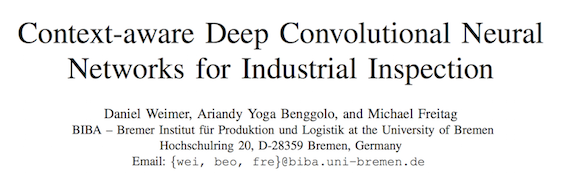

In [8]:
Image(path_to_data + '/images/context-aware.png')

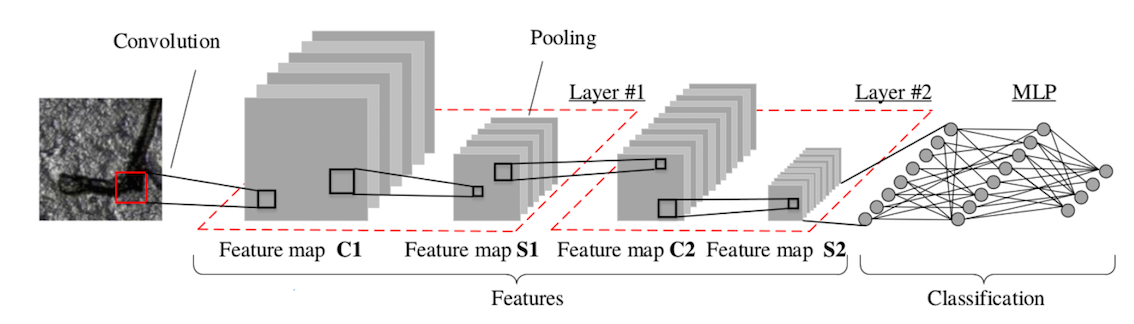

In [9]:
Image(path_to_data + '/images/CNN.png')

## How about Image Segmentation?

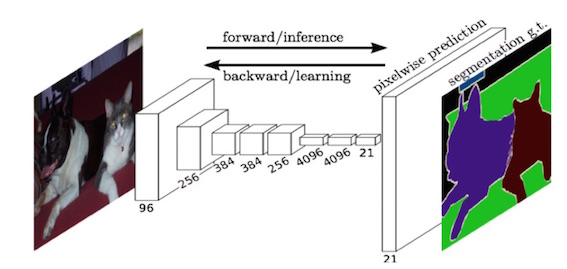

In [10]:
Image(path_to_data + '/images/FCN.jpg')

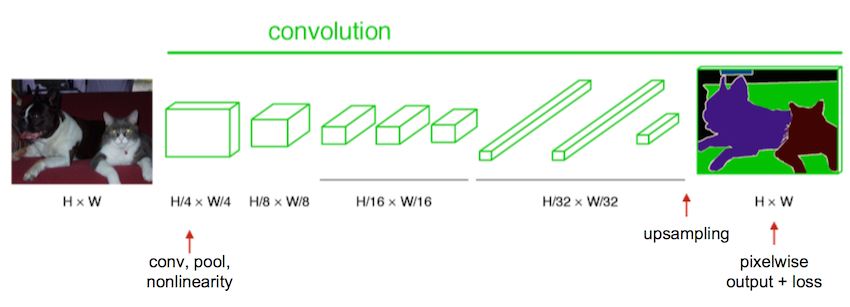

In [11]:
Image(path_to_data + '/images/operationFCN.png')

It was used to find out Left Ventricle from MRI image. (2nd Data Science BOWL competition)

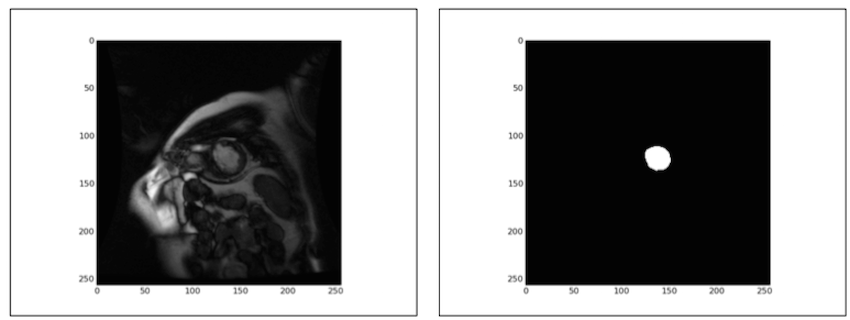

In [12]:
Image(path_to_data + '/images/LV.png')

It can also be used to find out lung and nodule from CT image.

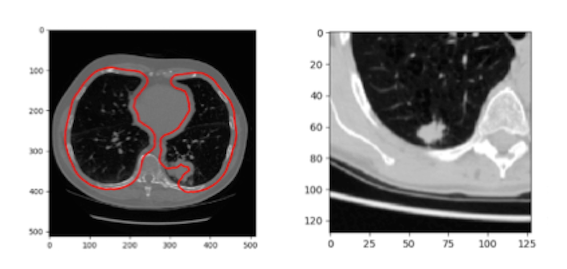

In [13]:
Image(path_to_data + '/images/lung_nodule.png')

## Data Preprocessing

- Segmentation Format
- Tranining, Validation, Test Dataset

### X, y format for image segmentation

Let's prepare the X (raw image) and y (mask), that will be used to build up our magic mapping function.

In [14]:
import sys
sys.path.append('/content/drive/My Drive')

In [15]:
!pip install xmltodict

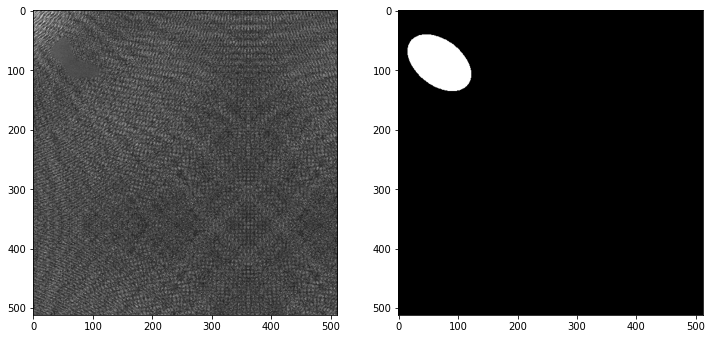

In [16]:
from coslib import plot_ellipse_seg_test
plot_ellipse_seg_test(path_to_data + '/data/DAGM/Class1_def/1.png')

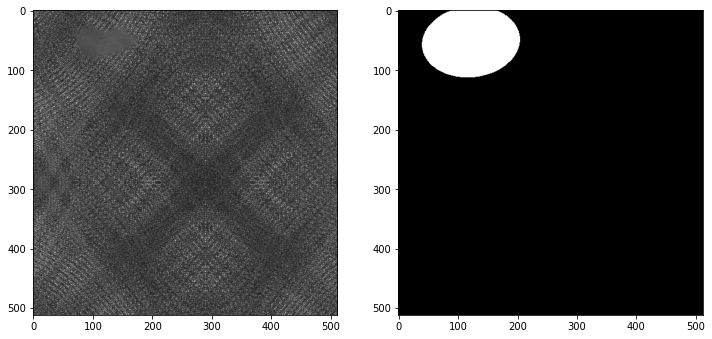

In [17]:
plot_ellipse_seg_test(path_to_data + '/data/DAGM/Class1_def/102.png')

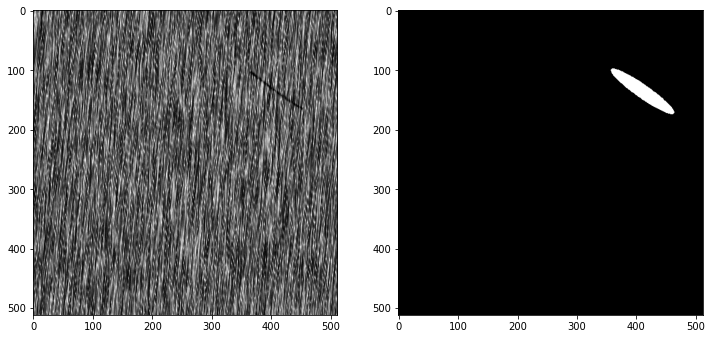

In [18]:
plot_ellipse_seg_test(path_to_data + '/data/DAGM/Class2_def/1.png')

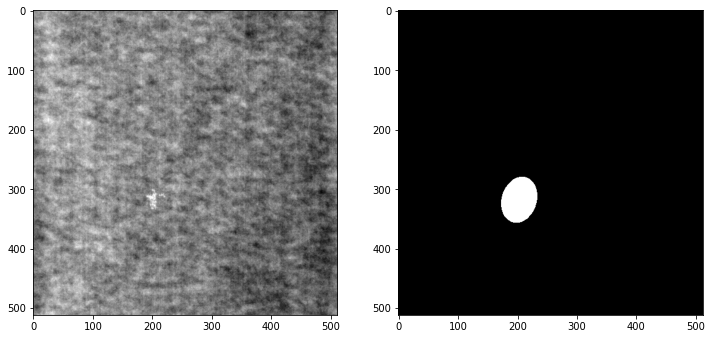

In [19]:
plot_ellipse_seg_test(path_to_data + '/data/DAGM/Class3_def/1.png')

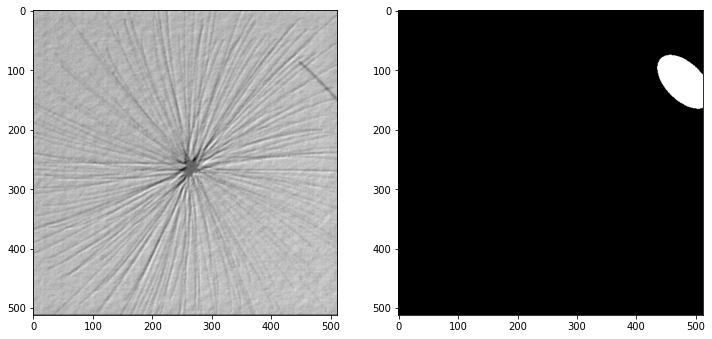

In [20]:
plot_ellipse_seg_test(path_to_data + '/data/DAGM/Class4_def/3.png')

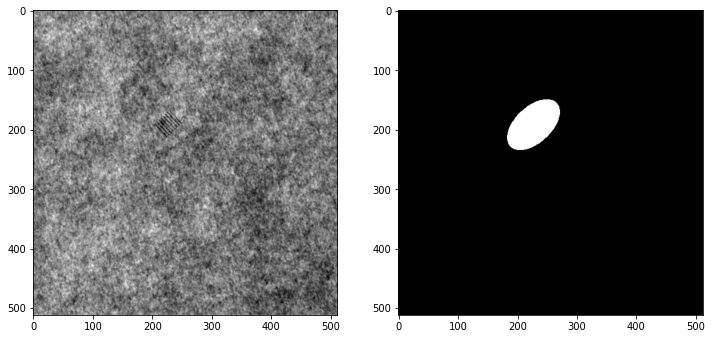

In [21]:
plot_ellipse_seg_test(path_to_data + '/data/DAGM/Class5_def/1.png')

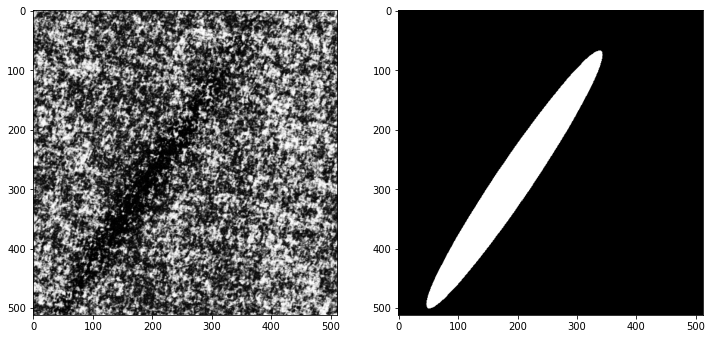

In [22]:
plot_ellipse_seg_test(path_to_data + '/data/DAGM/Class6_def/50.png')

### Tranining, Validation, Test Dataset split

In [23]:
IMAGE_HEIGHT = 512
IMAGE_WIDTH = 512
IMAGE_CHANNELS = 1

In [24]:
from sklearn.model_selection import train_test_split
import os
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from coslib import get_mask_seg_ellipse
plt.style.use('ggplot')

In [25]:
def load_images_masks(path_to_images):
    
    image_names = [x for x in os.listdir(path_to_images) if x.endswith('.png')]
    image_num = len(image_names)
    images_all = np.empty([image_num, IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS])
    labels_all = np.empty([image_num, IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS])

    for image_index in range(image_num):
        image_filename = str(image_index+1) + '.png'
        # print(image_filename)
        image = mpimg.imread(os.path.join(path_to_images, image_filename), format='gray')
        mask = get_mask_seg_ellipse(os.path.join(path_to_images, image_filename))
    
        images_all[image_index] = np.reshape(image, (IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS))
        labels_all[image_index] = np.reshape(mask, (IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS))
    
    
    return images_all, labels_all

In [26]:
images_all, labels_all = load_images_masks(path_to_data + '/data/DAGM/Class1_def/')

In [27]:
images_all.shape

(150, 512, 512, 1)

In [28]:
labels_all.shape

(150, 512, 512, 1)

(-0.5, 511.5, 511.5, -0.5)

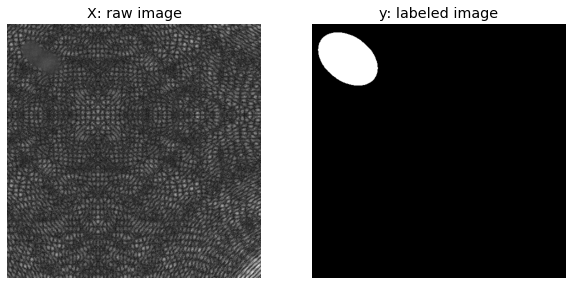

In [29]:
plt.figure(figsize=(10, 10))
    
plt.subplot(1,2,1)
plt.imshow(images_all[10,:,:,0], cmap='gray')
plt.title('X: raw image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(labels_all[10,:,:,0], cmap='gray')
plt.title('y: labeled image')
plt.axis('off')

In [30]:
X_train, X_test, y_train, y_test = train_test_split(images_all, labels_all, test_size=0.2)

In [31]:
X_train.shape

(120, 512, 512, 1)

In [32]:
X_test.shape

(30, 512, 512, 1)

### Unet - Fully Convolutional Neuralnetwork

The u-net is convolutional network architecture for fast and precise segmentation of images. Up to now it has outperformed the prior best method (a sliding-window convolutional network) on the ISBI challenge for segmentation of neuronal structures in electron microscopic stacks. It has won the Grand Challenge for Computer-Automated Detection of Caries in Bitewing Radiography at ISBI 2015, and it has won the Cell Tracking Challenge at ISBI 2015 on the two most challenging transmitted light microscopy categories (Phase contrast and DIC microscopy) by a large margin.

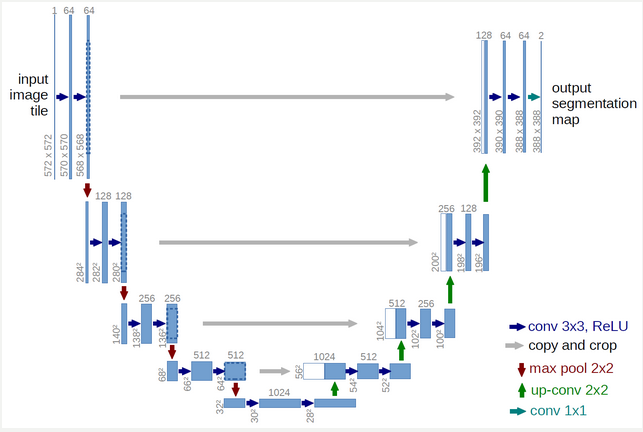

In [33]:
Image(path_to_data + '/images/Unet-model.jpg')

In [34]:
from keras.models import Model
from keras.layers import Input, merge, Conv2D, MaxPooling2D, UpSampling2D,Lambda, Conv2DTranspose, concatenate, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from scipy.ndimage.measurements import label
import time

In [35]:
img_rows = 512
img_cols = 512

In [36]:
### Defining a small Unet
### Smaller Unet defined so it fits in memory

def get_small_unet():
    inputs = Input((img_rows, img_cols, 1))
    conv1 = Conv2D(8, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(8, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(16, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv5)

    up6 = concatenate([Conv2DTranspose(64, kernel_size=(2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([Conv2DTranspose(32, kernel_size=(2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
    conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([Conv2DTranspose(16, kernel_size=(2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
    conv8 = Conv2D(16, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv2DTranspose(8, kernel_size=(2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
    conv9 = Conv2D(8, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(8, (3, 3), activation='relu', padding='same')(conv9)
    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)
    model = Model(inputs=inputs, outputs=conv10)

    
    return model

In [37]:
model = get_small_unet()

###  Define customized loss function 

IOU

Dice Metric

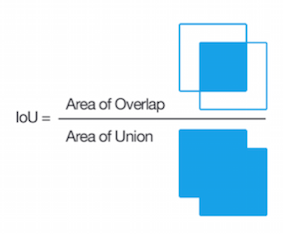

In [38]:
Image(path_to_data + '/images/IOU.png')

In [39]:
### IOU or dice coeff calculation
def IOU_calc(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    
    return 2*(intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def IOU_calc_loss(y_true, y_pred):
    return -IOU_calc(y_true, y_pred)

In [40]:
smooth = 1.
model.compile(optimizer=Adam(lr=1e-4), loss=IOU_calc_loss, metrics=[IOU_calc])

In [41]:
history = model.fit(X_train, y_train, batch_size=10, epochs=100, verbose=2, validation_split=0.2)

Epoch 1/100
10/10 - 3s - loss: -2.8193e-05 - IOU_calc: 3.0062e-05 - val_loss: -2.8708e-05 - val_IOU_calc: 3.8047e-05
Epoch 2/100
10/10 - 2s - loss: -4.3950e-05 - IOU_calc: 4.8171e-05 - val_loss: -6.0549e-05 - val_IOU_calc: 9.2596e-05
Epoch 3/100
10/10 - 2s - loss: -2.9290e-04 - IOU_calc: 3.1791e-04 - val_loss: -1.2653e-03 - val_IOU_calc: 0.0015
Epoch 4/100
10/10 - 2s - loss: -1.1394e-02 - IOU_calc: 0.0119 - val_loss: -4.5467e-02 - val_IOU_calc: 0.0454
Epoch 5/100
10/10 - 2s - loss: -5.9143e-02 - IOU_calc: 0.0596 - val_loss: -8.0357e-02 - val_IOU_calc: 0.0790
Epoch 6/100
10/10 - 2s - loss: -6.9921e-02 - IOU_calc: 0.0703 - val_loss: -8.1339e-02 - val_IOU_calc: 0.0800
Epoch 7/100
10/10 - 2s - loss: -6.9948e-02 - IOU_calc: 0.0699 - val_loss: -8.1559e-02 - val_IOU_calc: 0.0802
Epoch 8/100
10/10 - 2s - loss: -7.0906e-02 - IOU_calc: 0.0706 - val_loss: -8.2956e-02 - val_IOU_calc: 0.0816
Epoch 9/100
10/10 - 2s - loss: -7.2583e-02 - IOU_calc: 0.0719 - val_loss: -8.4975e-02 - val_IOU_calc: 0.0837

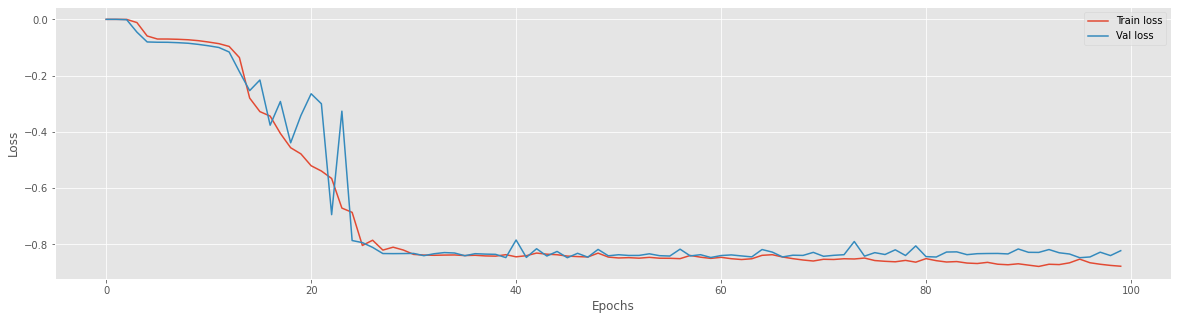

In [42]:
plt.figure(figsize=(20, 5))
plt.plot(model.history.history['loss'], label='Train loss')
plt.plot(model.history.history['val_loss'], label='Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

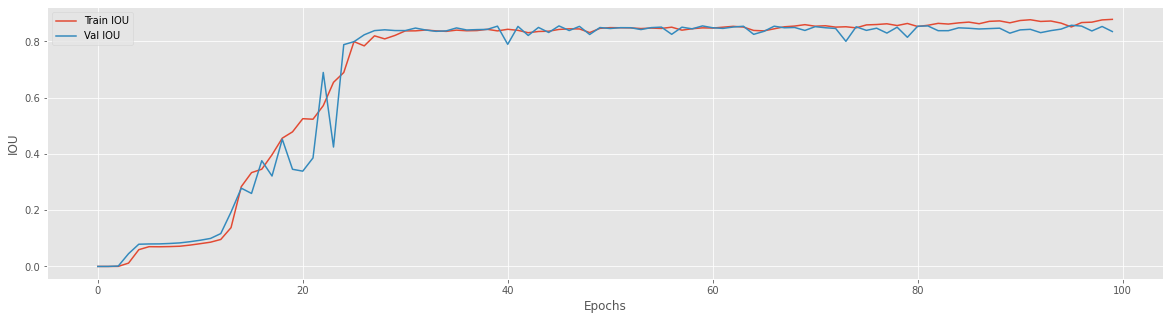

In [43]:
plt.figure(figsize=(20, 5))
plt.plot(model.history.history['IOU_calc'], label='Train IOU')
plt.plot(model.history.history['val_IOU_calc'], label='Val IOU')
plt.xlabel('Epochs')
plt.ylabel('IOU')
plt.legend()

In [44]:
predict_test = model.predict(X_test)

In [45]:
import cv2
def predict_evaluation(pred, image, label):
    '''
    '''
    # transform gray image to rgb
    img = np.array(image, np.uint8)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    # scale pred and mask's pixel range to 0~255
    im_label = np.array(255*label, dtype=np.uint8)
    im_pred = np.array(255*pred, dtype=np.uint8)
    
    # transform both of them to rgb
    rgb_label = cv2.cvtColor(im_label, cv2.COLOR_GRAY2RGB)
    rgb_pred = cv2.cvtColor(im_pred, cv2.COLOR_GRAY2RGB)
    
    rgb_label[:,:,1:3] = 0*rgb_label[:,:,1:2]
    rgb_pred[:,:,0] = 0*rgb_pred[:,:,0]
    rgb_pred[:,:,2] = 0*rgb_pred[:,:,2]
    
    img_pred = cv2.addWeighted(rgb_img, 1, rgb_pred, 0.3, 0)
    img_label = cv2.addWeighted(rgb_img, 1, rgb_label, 0.3, 0)
    
    plt.figure(figsize=(10, 10))
    
    plt.subplot(1,3,1)
    plt.imshow(rgb_img)
    plt.title('Original image')
    plt.axis('off')
    plt.subplot(1,3,2)
    plt.imshow(img_pred)
    plt.title('Prediction')
    plt.axis('off')
    plt.subplot(1,3,3)
    plt.imshow(img_label)
    plt.title('Ground truth')
    plt.axis('off')

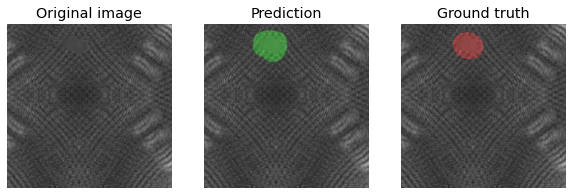

In [46]:
predict_evaluation(predict_test[0,:,:,0], X_test[0,:,:,0], y_test[0,:,:,0])

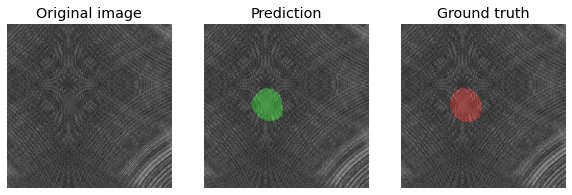

In [47]:
predict_evaluation(predict_test[1,:,:,0], X_test[1,:,:,0], y_test[1,:,:,0])

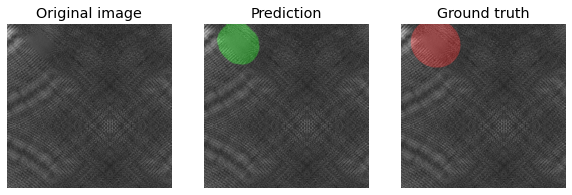

In [48]:
predict_evaluation(predict_test[2,:,:,0], X_test[2,:,:,0], y_test[2,:,:,0])

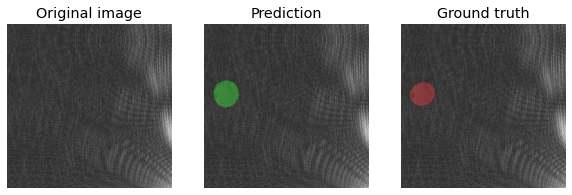

In [49]:
predict_evaluation(predict_test[3,:,:,0], X_test[3,:,:,0], y_test[3,:,:,0])

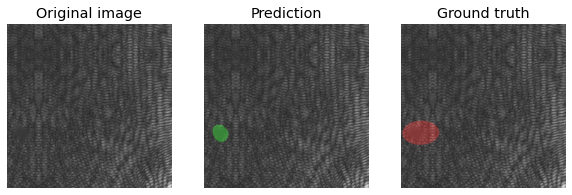

In [50]:
predict_evaluation(predict_test[4,:,:,0], X_test[4,:,:,0], y_test[4,:,:,0])

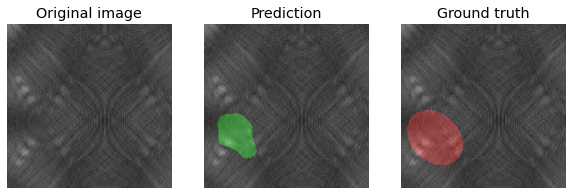

In [51]:
predict_evaluation(predict_test[5,:,:,0], X_test[5,:,:,0], y_test[5,:,:,0])